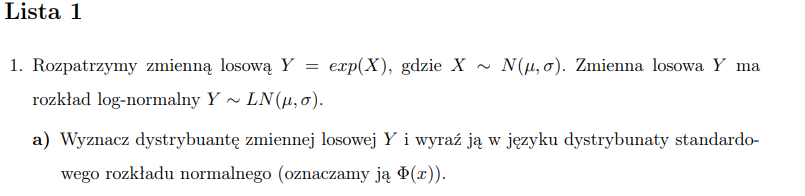

\begin{equation}
F_Y(x)=P(Y \leq x) = P(e^{X} \leq x) = P(X \leq ln(x)) = P\left(\frac{X- \mu}{\sigma} \leq \frac{ln(x)- \mu}{\sigma}\right)
= \phi \left(\frac{ln(x)- \mu}{\sigma}\right)
\end{equation}

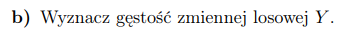

\begin{equation}
f_Y(x)=\frac{d}{dx} \phi \left(\frac{ln(x)- \mu}{\sigma}\right) = \varphi \left(\frac{ln(x)- \mu}{\sigma}\right) 
\frac{1}{\sigma x} = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{ln(x)- \mu}{\sigma}\right)^2} \frac{1}{\sigma x}, \quad x>0
\end{equation} 

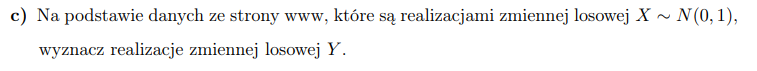

In [1]:
dane <- read.delim("dane1.txt", dec='.', header=FALSE)
str(dane)
X <- dane$V1
Y <- exp(X)

'data.frame':	1000 obs. of  1 variable:
 $ V1: num  0.538 1.834 -2.259 0.862 0.319 ...


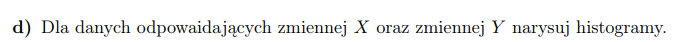

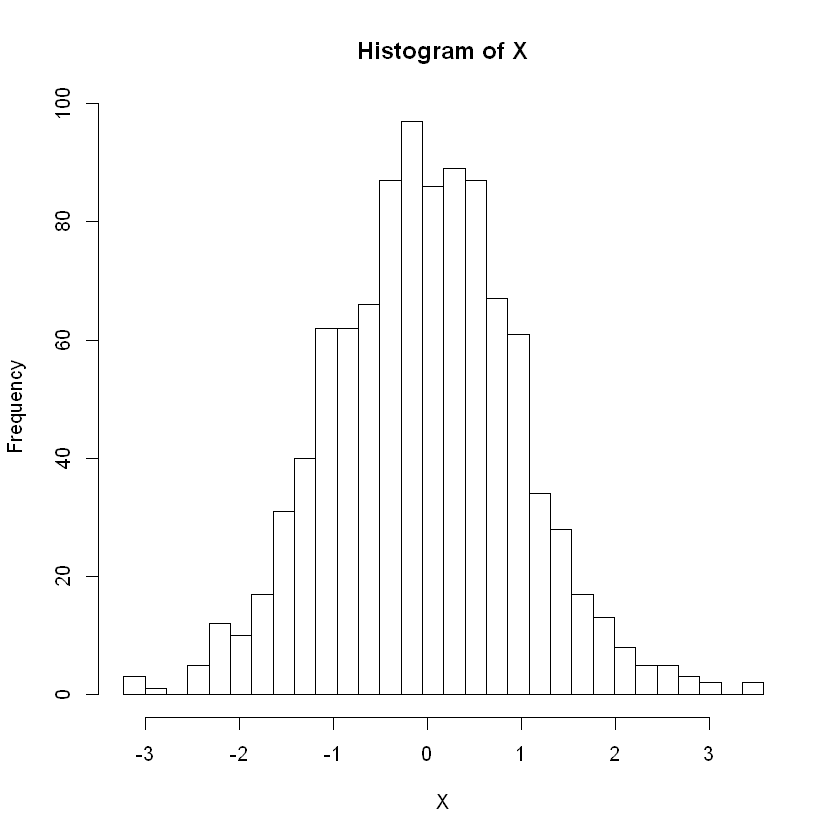

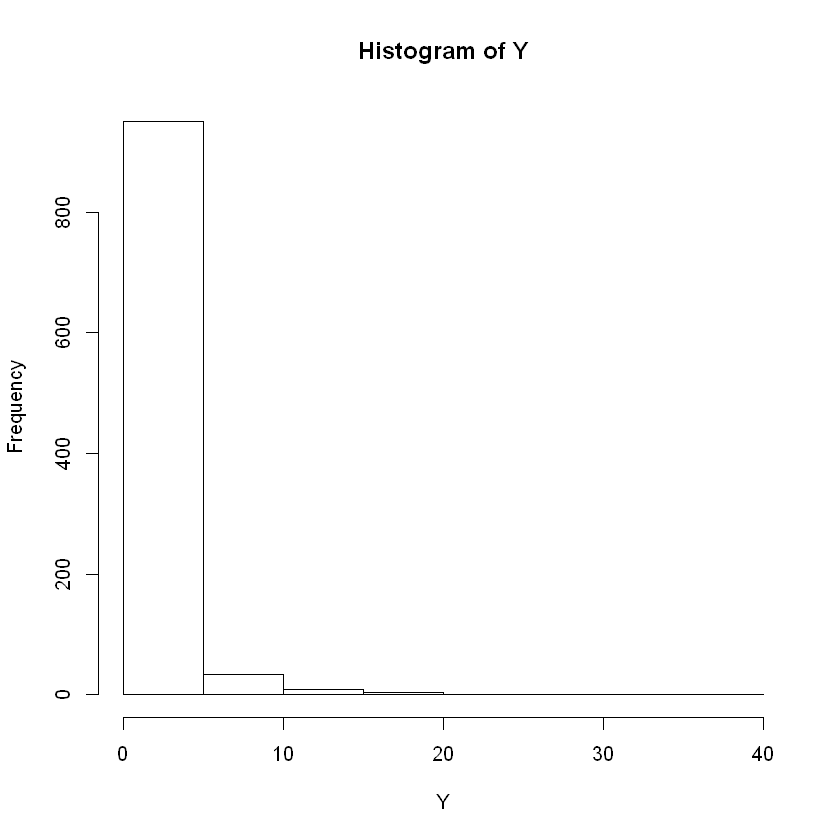

In [8]:
h <- hist(X, breaks = seq(min(X), max(X), length.out=31))
#h$counts <- h$counts/sum(h$counts) #hist czestosci
#plot(h)
hist(Y)

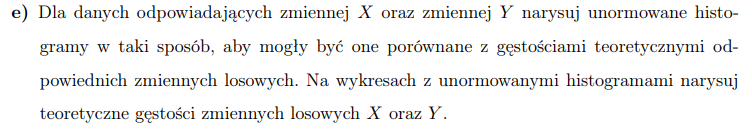

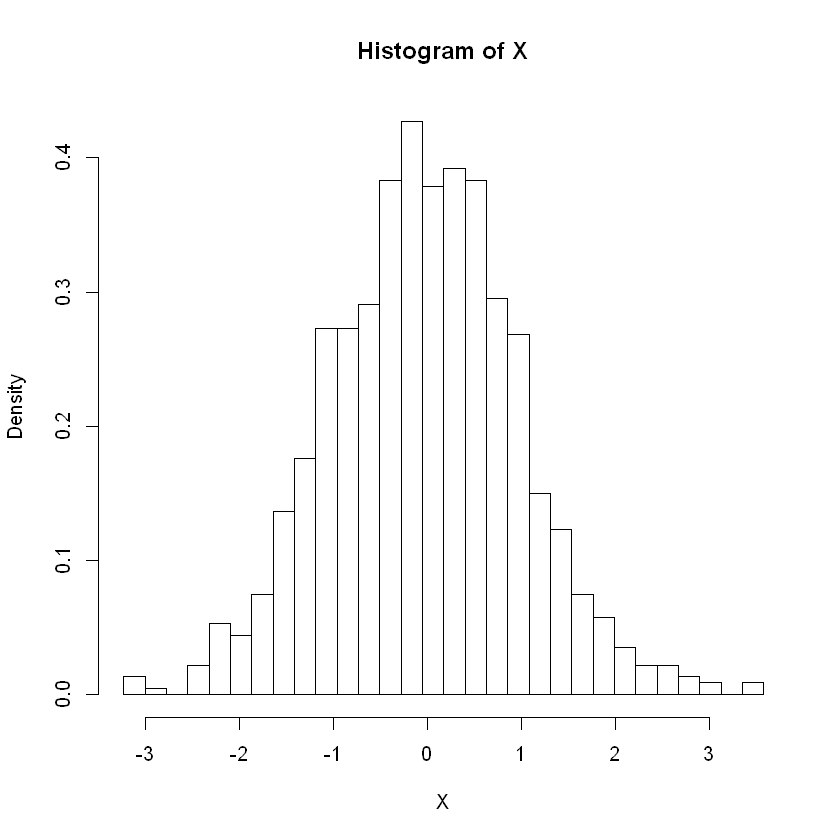

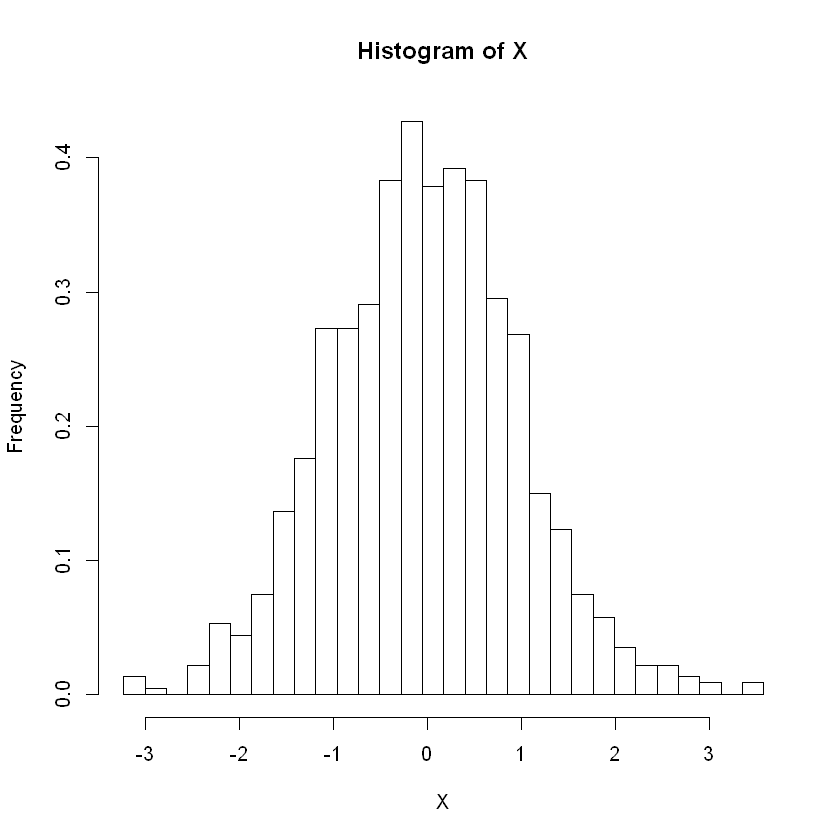

In [9]:
hist(X, breaks = seq(min(X), max(X), length.out=31), freq = FALSE) #1sposob
h$counts <- h$counts/(sum(h$counts)*(h$breaks[2]-h$breaks[1])) #2sposob
plot(h)

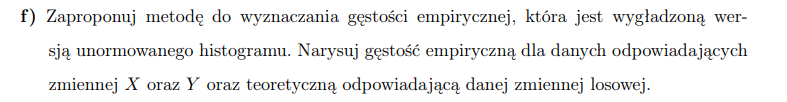

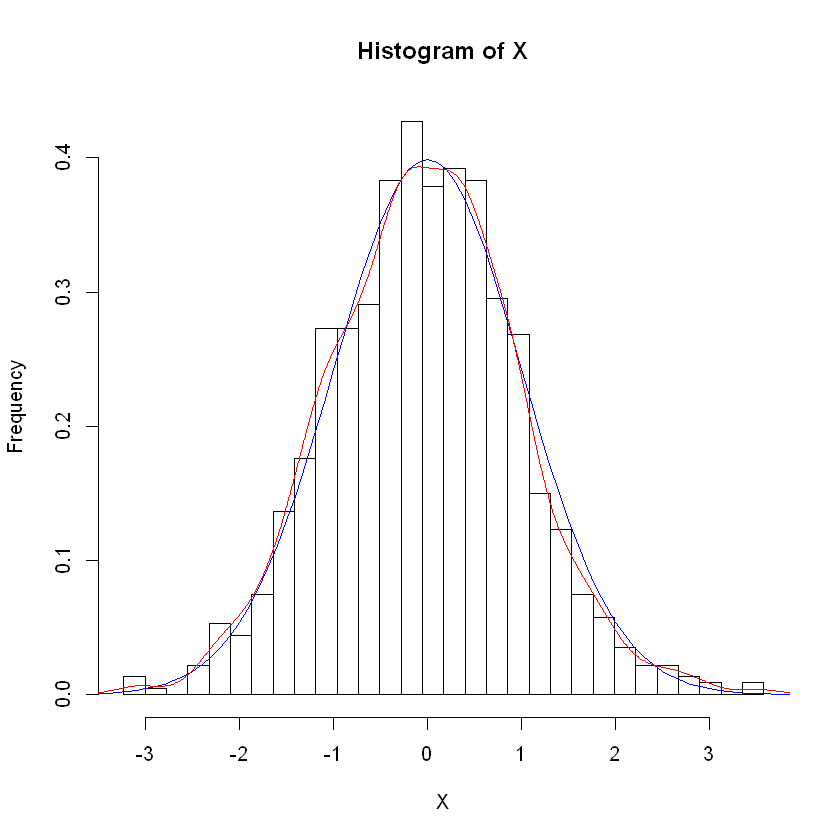

In [25]:
x5 <- seq(-4,4,0.1)
plot(h)
lines(x5, dnorm(x5, 0, 1), type='l', col ='blue')
lines(density(X), type='l', col='red')

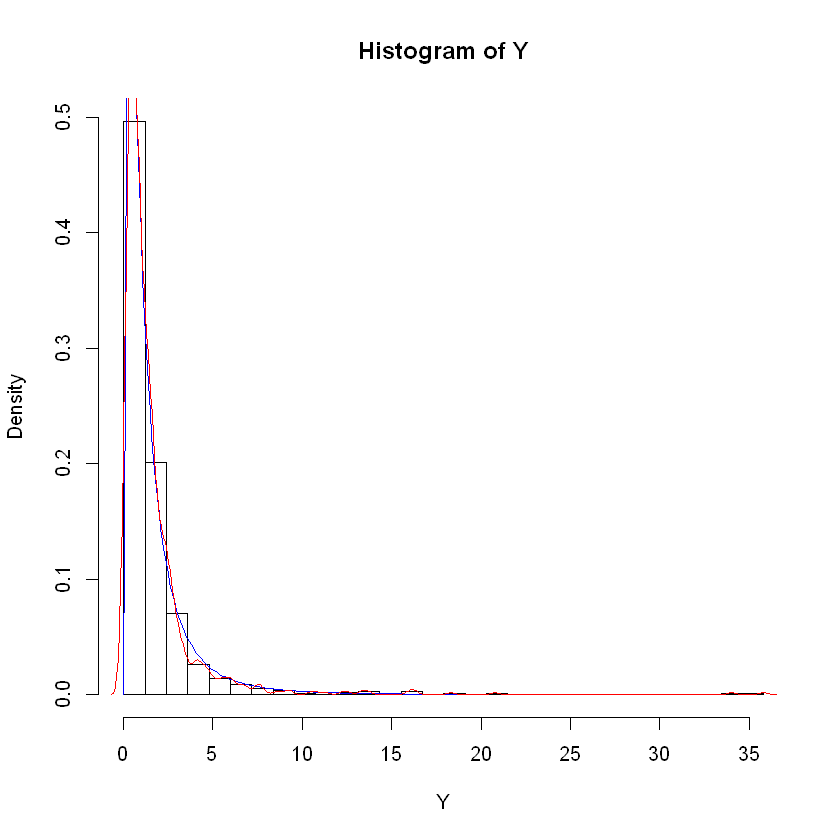

In [27]:
x6 <- seq(0,20,0.1)
hist(Y, breaks = seq(min(Y), max(Y), length.out=31), freq = FALSE)
lines(x6, dlnorm(x6), type='l', col='blue')
lines(density(Y), type='l', col = 'red')

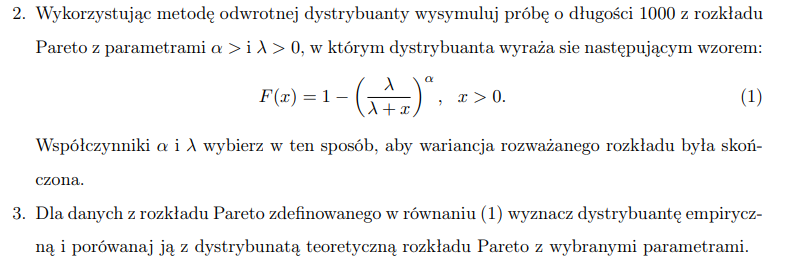

\begin{equation}
y = 1-\left(\frac{\lambda}{\lambda + x}\right)^{\lambda}
\end{equation}

\begin{equation}
\frac{\lambda}{\lambda +x}=(1-y)^{\frac{1}{\alpha}}
\end{equation}

\begin{equation}
\lambda+x=\lambda(1-y)^{-\frac{1}{\alpha}}
\end{equation}


\begin{equation}
x=\lambda(1-y)^{-\frac{1}{\alpha}}-\lambda
\end{equation}

In [1]:
pareto.rv <- function(lambda, alfa, n){
  X <- lambda*(runif(n))^(-1/alfa)-lambda
  return(X)
}

#war skonczona jesli alfa > 2

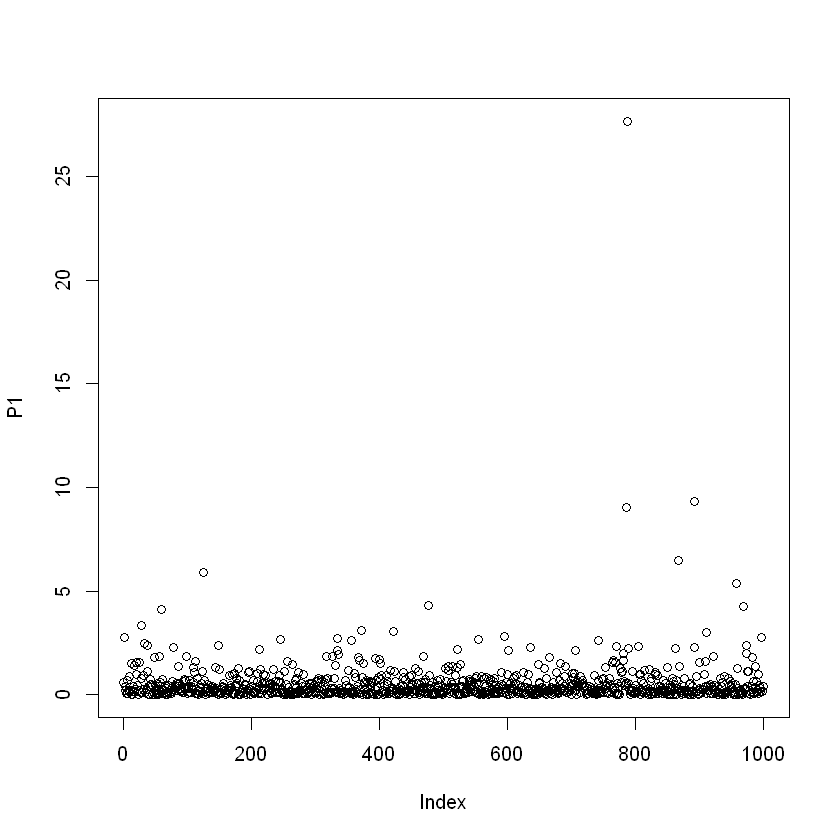

In [8]:
P1 <- pareto.rv(1,3,1000)
plot(P1)

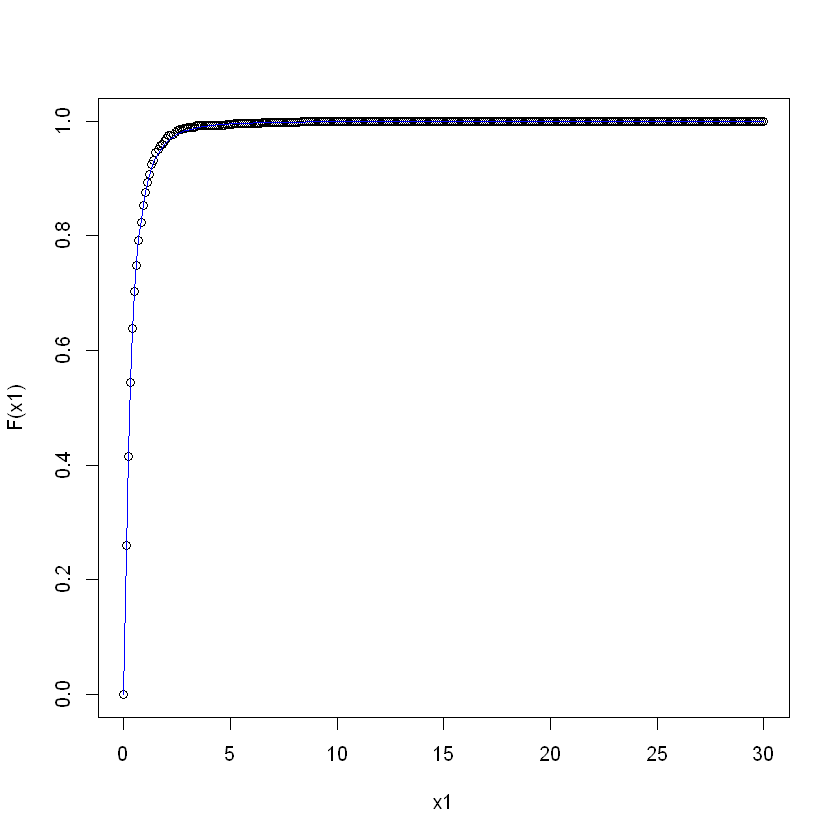

In [9]:
F <- ecdf(P)
x1 <- seq(0,30,0.1)
 
F1 <- 1-(1/(1+x1))^3
lines(x1, F1, col='blue')

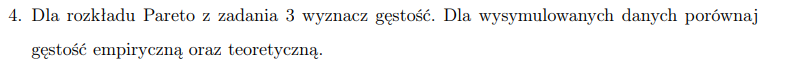

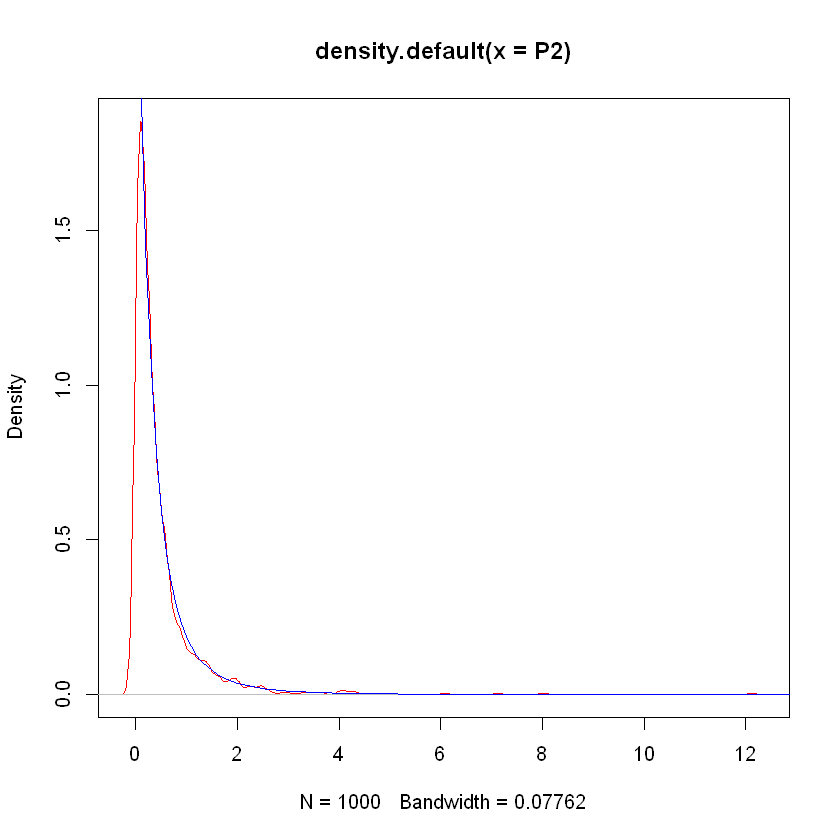

In [10]:
lambda = 1
alfa = 3
P2 <- pareto.rv(lambda, alfa, 1000)
x2 <- seq(0,20,0.1)
f <- (lambda)^(alfa)*(alfa)*(lambda+x2)^(-alfa-1) #pochodna z dystr policzona recznie
plot(density(P2), type='l', col='red')
lines(x2, f, col='blue')

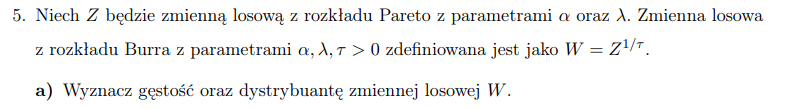

\begin{equation}
F_W(x)=P(W\leq x)=P(Z^{\frac{1}{\tau}}\leq x)=P(Z \leq x^{\tau})=F_Z(x^{\tau})=1-\left(\frac{\lambda}{\lambda+x^{\tau}}\right)^{\alpha}
\end{equation}

\begin{equation}
f_W(x)=(F_W(x))'=\left(\frac{-\lambda ^ {\alpha}}{(\lambda+x^{\tau})^{\alpha}}\right)'=
\left(-\lambda ^{\alpha} \frac{((\lambda+x^ {\tau})^{\alpha})'}{(\lambda +x^{\tau})^{2 \alpha}}\right)=
-\lambda ^{\alpha}((\lambda+x^{\tau})^{-\alpha})'=
-\lambda^{\alpha}(-\alpha(\lambda+x^{\tau})^{-\alpha-1} \tau x^{\tau -1})=
\alpha \lambda^{\alpha}\frac{\tau x^{\tau -1}}{(\lambda+x^{\tau})^{\alpha +1}}, \quad x>0
\end{equation}

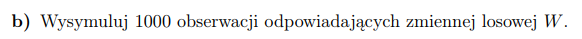

In [12]:
burra <- function(lambda, alfa, n, tau){
  X <- (pareto.rv(lambda, alfa, n))^(1/tau)
  return(X)
}

In [13]:
tau = 2
B <- burra(lambda, alfa, 1000, tau)

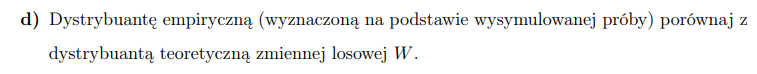

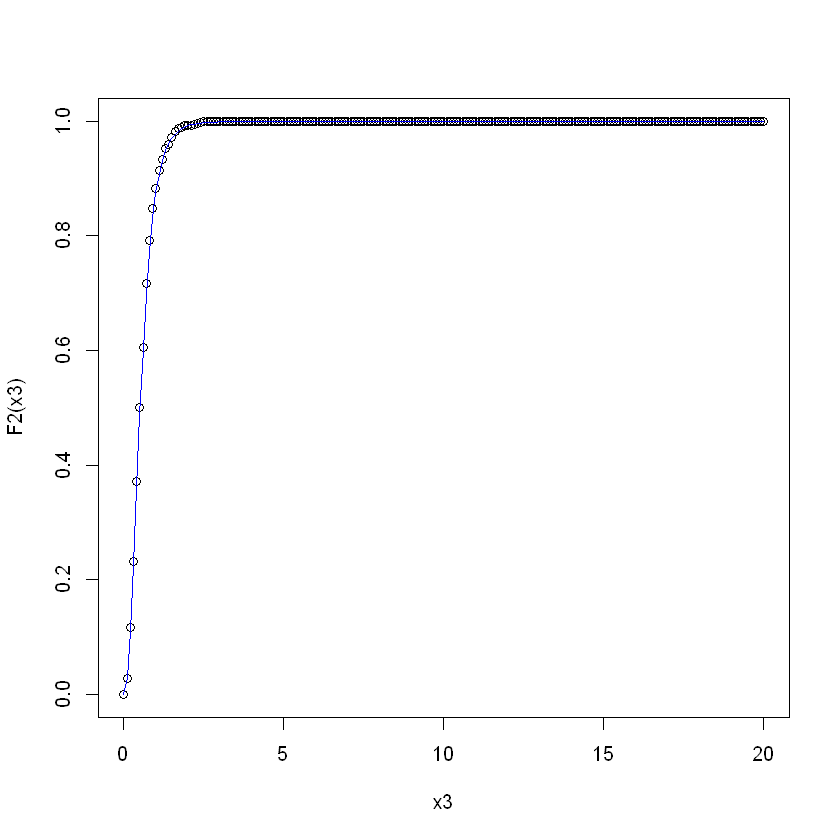

In [15]:
F2 <- ecdf(B) #dystr empiryczna
x3 <- seq(0,20,0.1)
plot(x3, F2(x3))
F3 <- 1-(lambda/(lambda+x3^(tau)))^(alfa) #dystr teoretyczna
lines(x3, F3, col='blue')

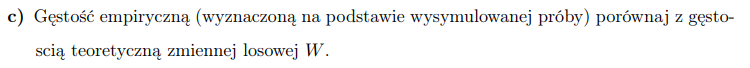

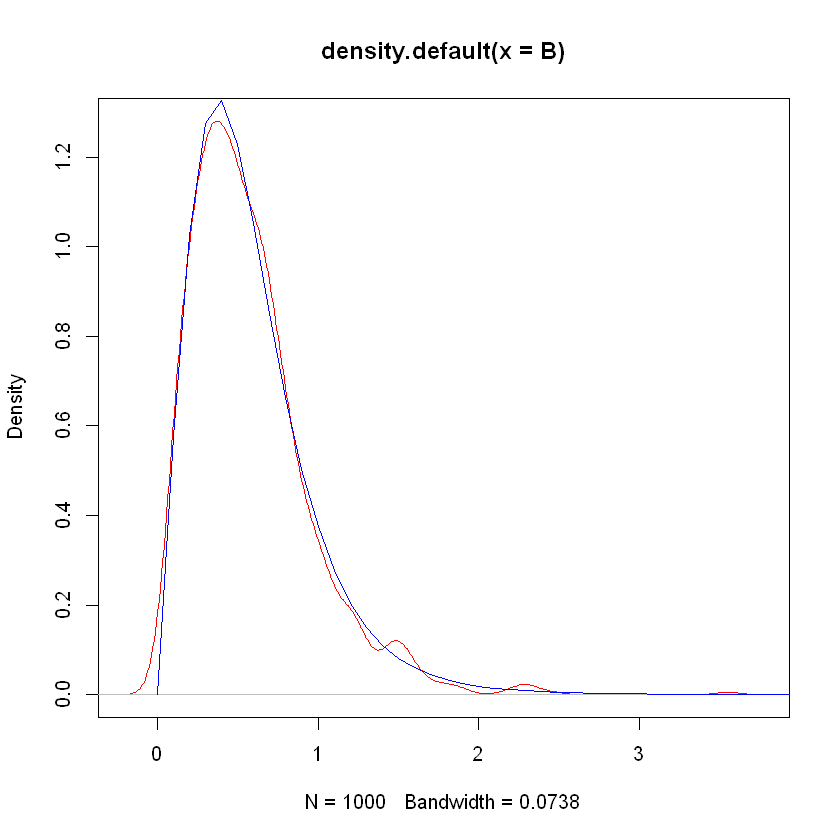

In [16]:
f1 <- alfa*(lambda)^(alfa)*((tau*x3^(tau-1))/(lambda+x3^(tau))^(alfa+1)) #gest teoretyczna
plot(density(B), type='l', col='red') #gestosc  empiryczna
lines(x3, f1, col='blue')